In [68]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
folder = "Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7786686 entries, 0 to 75117
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 668.3+ MB


In [6]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401
1,1315458,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1421,14.0,NaN,41.910320,-87.702020
2,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623
3,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
4,1312658,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,41.915450,-87.726575


## Question One: 
---
Which district has the most crimes? Which has the least?

In [20]:
## Grouping by district to discover which district had the most and least crime
df_district = df.groupby("District").count()
df_district.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Latitude,Longitude
District,,,,,,,,,,
1.0,314686,314686,314686,313966,314686,314686,314686,294847,310375,310375
2.0,368491,368491,368491,367796,368491,368491,368491,325659,363852,363852
3.0,394929,394929,394929,394462,394929,394929,394929,364298,391159,391159
4.0,442122,442122,442122,441667,442122,442122,442122,410214,438315,438315
5.0,345097,345097,345097,344782,345097,345097,345097,319336,339984,339984


### Results:
---
District 4 had the highest amount of crime at 442122
District 1 had the least amount of arrests at 314686

## Question Two:
---
Is the total number of crimes increasing or decreasing across the years?
Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [14]:
## Converting date column to date time date type
df["Date"] = pd.to_datetime(df["Date"])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7786686 entries, 0 to 75117
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 668.3+ MB


In [15]:
## Setting the date column to be the index for searching and filtering purposes
df = df.set_index("Date")
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1311358,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401
2001-01-01 01:00:00,1315458,THEFT,$500 AND UNDER,STREET,False,False,1421,14.0,NaN,41.910320,-87.702020
2001-01-01 01:00:00,1330412,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623
2001-01-01 01:00:00,1328315,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
2001-01-01 01:00:00,1312658,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,41.915450,-87.726575


In [33]:
## Looping through years to find crime counts for each year
results = {}
years = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", 
         "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016",
        "2017", "2018", "2019", "2020", "2021", "2022", "2023"] 
for x in years:
    df_current = df.loc[x : x].copy()
    year_count = df_current["Primary Type"].count()
    results[x] = year_count
    
    
results

{'2001': 485879,
 '2002': 486804,
 '2003': 475980,
 '2004': 469421,
 '2005': 453771,
 '2006': 448174,
 '2007': 437084,
 '2008': 427167,
 '2009': 392819,
 '2010': 370496,
 '2011': 351964,
 '2012': 336262,
 '2013': 307468,
 '2014': 275731,
 '2015': 264755,
 '2016': 269786,
 '2017': 269073,
 '2018': 268773,
 '2019': 261248,
 '2020': 212098,
 '2021': 208575,
 '2022': 238240,
 '2023': 75118}

In [44]:
crime_dict = {}
crimes = df["Primary Type"].unique()
for x in years:
    for y in crimes:
        df_current = df.loc[x : x].copy()
        crime = df_current["Primary Type"] == y
        total = crime.sum()
        crime_dict[x] = y 
crime_dict

{'2001': 'NON - CRIMINAL',
 '2002': 'NON - CRIMINAL',
 '2003': 'NON - CRIMINAL',
 '2004': 'NON - CRIMINAL',
 '2005': 'NON - CRIMINAL',
 '2006': 'NON - CRIMINAL',
 '2007': 'NON - CRIMINAL',
 '2008': 'NON - CRIMINAL',
 '2009': 'NON - CRIMINAL',
 '2010': 'NON - CRIMINAL',
 '2011': 'NON - CRIMINAL',
 '2012': 'NON - CRIMINAL',
 '2013': 'NON - CRIMINAL',
 '2014': 'NON - CRIMINAL',
 '2015': 'NON - CRIMINAL',
 '2016': 'NON - CRIMINAL',
 '2017': 'NON - CRIMINAL',
 '2018': 'NON - CRIMINAL',
 '2019': 'NON - CRIMINAL',
 '2020': 'NON - CRIMINAL',
 '2021': 'NON - CRIMINAL',
 '2022': 'NON - CRIMINAL',
 '2023': 'NON - CRIMINAL'}

## Question Three:
---
Comparing AM vs. PM Rush Hour:
1. Are crimes more common during AM rush hour or PM rush hour?
    You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
    You can consider any crime that occurred between 4 -7 PM as PM rush hour.
2. What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
3. Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

### Question 3.1
Are crimes more common during AM rush hour or PM rush hour? You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour You can consider any crime that occurred between 4 -7 PM as PM rush hour.

In [66]:
crimes_by_hour = df.groupby("Primary Type")["HourOfDay"].value_counts().sort_index()
plot_df = crimes_by_hour.to_frame("Number of Crimes").reset_index()
plot_df

,Primary Type,HourOfDay,Number of Crimes
0,ARSON,0,1080
1,ARSON,1,1075
2,ARSON,2,1066
3,ARSON,3,990
4,ARSON,4,891
...,...,...,...
795,WEAPONS VIOLATION,19,7694
796,WEAPONS VIOLATION,20,8399
797,WEAPONS VIOLATION,21,8896
798,WEAPONS VIOLATION,22,8840


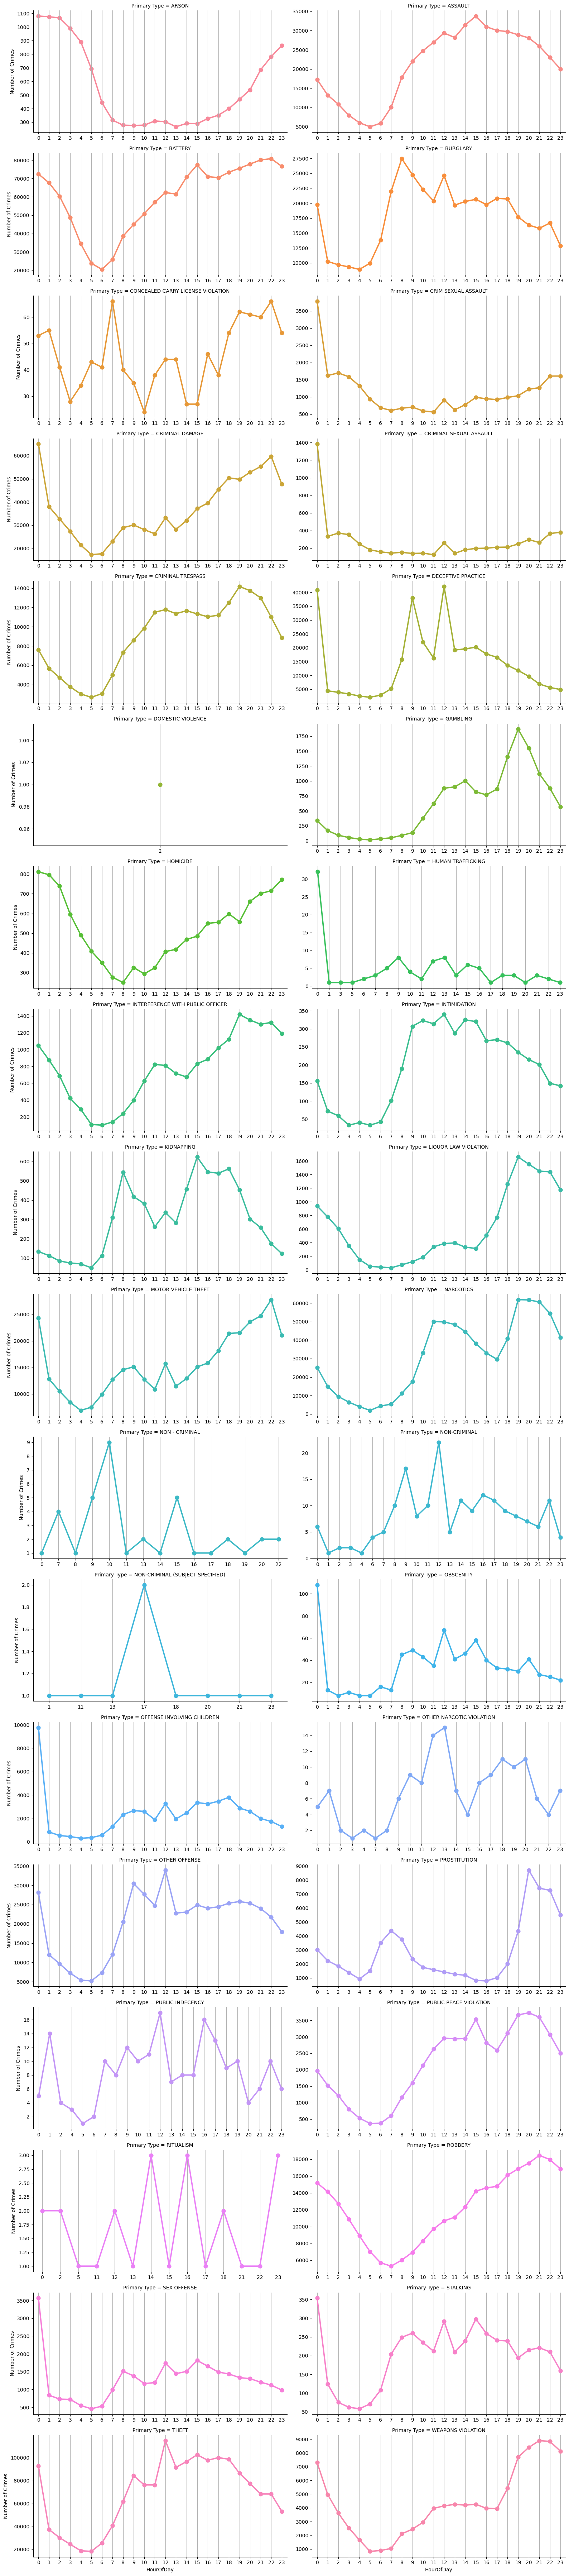

In [76]:
## Graphing crimes grouped by hour
g = sns.catplot(data=plot_df, x='HourOfDay', y='Number of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];


### Results:
---
1. Crime is more common during the PM rush hour than the AM rush hour
2. The top five crimes during the AM rush hour are: Battery, Assault, Narcotics, MOTOR Vehicle Theft, Narcotics, Robbery
3. The top five crimes during the PM rush hour are: 
4. Motor vehicle theft is more common during the PM rush hour than AM